In [ ]:
#run this before, for importing libraries and mounting the drive
import pandas as pd
import matplotlib.pyplot as plt
import os
import nibabel as nib
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



**CT** (Computed Tomography) scans show a slice, or cross-section, of the body. The image shows your **bones, organs, and soft tissues** (like muscles) more clearly than standard x-rays. CT scans can show a tumor's shape, size, and location. They can even show the blood vessels that feed the tumor

*   *Tech*: 3D x-rays through the body, but radiations don't remain inside the body
*   *Detect and monitor*: body structure, internal blood vessels, fractures
*   Procedure time: 5-10mins max (so it's helpful in emergency diagnosis)
*   usually greyscale

**PET** (Positron emission tomography) scans are used to produce detailed 3D images of the inside of the body. The images can clearly show the part of the body being investigated, including any abnormal areas, and can highlight how well certain functions of the body are working.

*   *Tech*: injects a tiny amount of the radioactive tracer into a patient’s vein, usually on the inside of an elbow. After the injection, the tracer will move through the body and gather in tissues and organs. A patient will need to wait for about an hour for their body to absorb the tracer. Tracers will collect in tumors, inflamed areas or cancer cells for doctors to see.
After the tracer is absorbed, the patient will move to an exam table that slides into a scanner. The PET scanner will detect the tracer and turn the data into 3-D images on a computer monitor.
*   *Detect and monitor*: Cancer (quicklier than other tests, even in the earliest stages), Heart and Brain activities
*   *Procedure* time: 60-90mins because the body has to absorb the radioactive tracers
*   usually colorful and it should have a colorbar

Both are usually performed at an outpatient facility and do not require a hospital stay

Both can be used to detect cancer

Both are accurate, painless and noninvasive procedures

Both help eliminate the need for exploratory surgery

In [ ]:
!pip install nilearn --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 57.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 89.9 MB/s eta 0:00:00
  Attempting uninstall: nibabel
    Found existing installation: nibabel 3.0.2
    Uninstalling nibabel-3.0.2:
      Successfully uninstalled nibabel-3.0.2


#first part

In [ ]:
# saving pet and ct volumes, and the glucose uptake of each one of the 30 patients of the benign directory into a dict file;
# the dict will be converted into a dataframe later to pass them to the svm and rf previously defined function in the last healthcare project

#data_dir = '/content/drive/MyDrive/MSc/Healthcare/Project no. 2 - PET-CT/Castiglioni_masse_polmonari_laboratorio/CLASS2_BENIGN'
benign_dir = '/content/drive/MyDrive/Master degree AI/Healthcare/CLASS2_BENIGN'
malign_dir = '/content/drive/MyDrive/Master degree AI/Healthcare/CLASS1_MALIGNANT'

malignant = [f.path for f in os.scandir(malign_dir) if f.is_dir()]
benign = [f.path for f in os.scandir(benign_dir) if f.is_dir()]

malignant = sorted(malignant)
benign = sorted(benign)

num_patients = 30
patient_count = 0

dataset = {'PET_mask_volume':[], 'CT_mask_volume':[], 'Glucose':[]}
for patient in benign:
   
    patient_id = os.path.basename(patient)[:7]
    pet_scan_path = os.path.join(patient, f"{patient_id}_PT_partition.nii")
    pet_mask_path = os.path.join(patient, f"{patient_id}_PT_mask.nii")
    ct_scan_path = os.path.join(patient, f"{patient_id}_CT_partition.nii")
    ct_mask_path = os.path.join(patient, f"{patient_id}_CT_mask.nii")

    pet_scan = nib.load(pet_scan_path)
    pet_mask = nib.load(pet_mask_path)
    ct_scan = nib.load(ct_scan_path)
    ct_mask = nib.load(ct_mask_path)

    pet_voxel_size = pet_scan.header.get_zooms()
    pet_scan_data = pet_scan.get_fdata()
    pet_mask_data = pet_mask.get_fdata()

    ct_voxel_size = ct_scan.header.get_zooms()
    ct_scan_data = ct_scan.get_fdata()
    ct_mask_data = ct_mask.get_fdata()


    pet_mask_volume = np.sum(pet_mask_data == 1) * pet_voxel_size[0] * pet_voxel_size[1] * pet_voxel_size[2] / 1000
    ct_mask_volume = np.sum(ct_mask_data == 1) * ct_voxel_size[0] * ct_voxel_size[1] * ct_voxel_size[2] / 1000
    glucose = pet_scan_data[pet_mask_data.astype(bool)].mean()
 
 
    print(f"Patient {patient_id} pet mask volume: {pet_mask_volume:.2f} cm^3, ct mask volume: {ct_mask_volume.round(2)} cm^3, Glucose uptake: {glucose.round(2)}")
    dataset['PET_mask_volume'].append(pet_mask_volume)
    dataset['CT_mask_volume'].append(ct_mask_volume)
    dataset['Glucose'].append(glucose)

    patient_count += 1
    if patient_count == num_patients:
        break

#train and test. 3 featuresvolume, volume su pet, consumo medio glucosio. : output: no. images, labels and 3 features

Patient LCp0001 pet mask volume: 7.45 cm^3, ct mask volume: 4.26 cm^3, Glucose uptake: 3.69
Patient LCp0002 pet mask volume: 5.42 cm^3, ct mask volume: 12.01 cm^3, Glucose uptake: 3.82
Patient LCp0003 pet mask volume: 7.87 cm^3, ct mask volume: 3.37 cm^3, Glucose uptake: 1.44
Patient LCp0004 pet mask volume: 11.65 cm^3, ct mask volume: 16.12 cm^3, Glucose uptake: 1.69
Patient LCp0005 pet mask volume: 3.33 cm^3, ct mask volume: 1.55 cm^3, Glucose uptake: 0.66
Patient LCp0007 pet mask volume: 4.78 cm^3, ct mask volume: 6.98 cm^3, Glucose uptake: 9.01
Patient LCp0008 pet mask volume: 3.87 cm^3, ct mask volume: 1.58 cm^3, Glucose uptake: 1.39
Patient LCp0009 pet mask volume: 3.56 cm^3, ct mask volume: 2.37 cm^3, Glucose uptake: 2.72
Patient LCp0010 pet mask volume: 6.37 cm^3, ct mask volume: 6.17 cm^3, Glucose uptake: 5.14
Patient LCp0012 pet mask volume: 2.21 cm^3, ct mask volume: 2.79 cm^3, Glucose uptake: 4.47
Patient LCp0013 pet mask volume: 3.05 cm^3, ct mask volume: 3.1 cm^3, Glucose

In [ ]:
# the same we did two cells above, but on the malignant directory
malignant = [f.path for f in os.scandir(malign_dir) if f.is_dir()]
benign = [f.path for f in os.scandir(benign_dir) if f.is_dir()]

malignant = sorted(malignant)
benign = sorted(benign)

num_patients = 30
patient_count = 0

for patient in malignant:
   
    patient_id = os.path.basename(patient)[:7]
    pet_scan_path = os.path.join(patient, f"{patient_id}_PT_partition.nii")
    pet_mask_path = os.path.join(patient, f"{patient_id}_PT_mask.nii")
    ct_scan_path = os.path.join(patient, f"{patient_id}_CT_partition.nii")
    ct_mask_path = os.path.join(patient, f"{patient_id}_CT_mask.nii")

    pet_scan = nib.load(pet_scan_path)
    pet_mask = nib.load(pet_mask_path)
    ct_scan = nib.load(ct_scan_path)
    ct_mask = nib.load(ct_mask_path)

    pet_voxel_size = pet_scan.header.get_zooms()
    pet_scan_data = pet_scan.get_fdata()
    pet_mask_data = pet_mask.get_fdata()

    ct_voxel_size = ct_scan.header.get_zooms()
    ct_scan_data = ct_scan.get_fdata()
    ct_mask_data = ct_mask.get_fdata()


    pet_mask_volume = np.sum(pet_mask_data == 1) * pet_voxel_size[0] * pet_voxel_size[1] * pet_voxel_size[2] / 1000
    ct_mask_volume = np.sum(ct_mask_data == 1) * ct_voxel_size[0] * ct_voxel_size[1] * ct_voxel_size[2] / 1000
    glucose = pet_scan_data[pet_mask_data.astype(bool)].mean()
 
 
    print(f"Patient {patient_id} pet mask volume: {pet_mask_volume:.2f} cm^3, ct mask volume: {ct_mask_volume.round(2)} cm^3, Glucose uptake: {glucose.round(2)}")
    dataset['PET_mask_volume'].append(pet_mask_volume)
    dataset['CT_mask_volume'].append(ct_mask_volume)
    dataset['Glucose'].append(glucose)

    patient_count += 1
    if patient_count == num_patients:
        break

Patient LCp0016 pet mask volume: 75.86 cm^3, ct mask volume: 31.21 cm^3, Glucose uptake: 4.44
Patient LCp0020 pet mask volume: 23.43 cm^3, ct mask volume: 8.5 cm^3, Glucose uptake: 5.69
Patient LCp0023 pet mask volume: 68.64 cm^3, ct mask volume: 67.1 cm^3, Glucose uptake: 4.5
Patient LCp0026 pet mask volume: 42.48 cm^3, ct mask volume: 39.61 cm^3, Glucose uptake: 3.6
Patient LCp0027 pet mask volume: 54.31 cm^3, ct mask volume: 151.33 cm^3, Glucose uptake: 5.24
Patient LCp0028 pet mask volume: 210.35 cm^3, ct mask volume: 156.99 cm^3, Glucose uptake: 4.24
Patient LCp0035 pet mask volume: 47.41 cm^3, ct mask volume: 73.02 cm^3, Glucose uptake: 9.53
Patient LCp0038 pet mask volume: 119.37 cm^3, ct mask volume: 481.3 cm^3, Glucose uptake: 12.37
Patient LCp0041 pet mask volume: 162.13 cm^3, ct mask volume: 125.45 cm^3, Glucose uptake: 12.88
Patient LCp0045 pet mask volume: 63.29 cm^3, ct mask volume: 42.46 cm^3, Glucose uptake: 4.91
Patient LCp0046 pet mask volume: 22.69 cm^3, ct mask volu

In [ ]:
#righe e colonna target
M = np.zeros((30, 1), dtype = np.int8)
N = np.ones((30, 1), dtype = np.int8)

dataset['y'] = M
dataset['y'] =  np.append(dataset['y'], N)

DF = pd.DataFrame(dataset)
DF

,PET_mask_volume,CT_mask_volume,Glucose,y
0,7.449557,4.264832,3.689928,0
1,5.417764,12.010729,3.823054,0
2,7.871091,3.367894,1.437953,0
3,11.653304,16.118215,1.694493,0
4,3.332436,1.546420,0.660431,0
5,4.783988,6.980281,9.007027,0
6,3.866946,1.575470,1.389443,0
7,3.557324,2.365472,2.721367,0
8,6.369087,6.172180,5.143324,0
9,2.207994,2.787223,4.469560,0


In [ ]:
df = DF.sample(frac = 1)
df.reset_index()

,index,PET_mask_volume,CT_mask_volume,Glucose,y
0,40,22.689873,11.577606,3.720814,1
1,5,4.783988,6.980281,9.007027,0
2,57,42.252070,24.291992,4.476632,1
3,6,3.866946,1.575470,1.389443,0
4,16,1.206219,1.185792,4.399799,0
5,47,40.991008,53.794618,13.328532,1
6,35,210.350480,156.993866,4.235270,1
7,33,42.479537,39.608002,3.600601,1
8,18,11.428416,39.516215,14.139402,0
9,50,60.790663,37.765503,5.740175,1


In [ ]:
# saving the file into a directory to avoid rerunning the entire code evertytime, given that it is quite slow
df.to_csv('/content/drive/MyDrive/Master degree AI/Healthcare/masse_polmonarii.csv', index = False)

##if this is not the first time you run the code, run from HERE

In [ ]:
# if this is not the first time you run the code, run from HERE
df = pd.read_csv('/content/drive/MyDrive/Master degree AI/Healthcare/masse_polmonarii.csv')
#df = df.drop(columns = 'Patient', axis = 1)
df

,PET_mask_volume,CT_mask_volume,Glucose,y
0,22.689873,11.577606,3.720814,1
1,4.783988,6.980281,9.007027,0
2,42.252070,24.291992,4.476632,1
3,3.866946,1.575470,1.389443,0
4,1.206219,1.185792,4.399799,0
5,40.991008,53.794618,13.328532,1
6,210.350480,156.993866,4.235270,1
7,42.479537,39.608002,3.600601,1
8,11.428416,39.516215,14.139402,0
9,60.790663,37.765503,5.740175,1


In [ ]:
!pip install nilearn --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Text(0.5, 1.0, 'slice 4 CT')

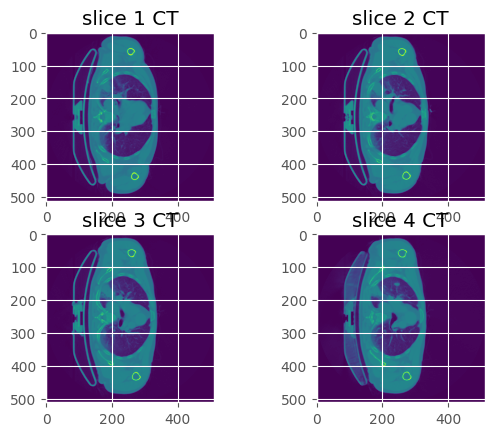

In [ ]:
# patient 1 malignant = LCp0016
Mask_CT_1 = nib.load('/content/drive/MyDrive/Master degree AI/Healthcare/CLASS1_MALIGNANT/LCp0016_biobank/LCp0016_CT_mask.nii')
CT_1 = nib.load('/content/drive/MyDrive/Master degree AI/Healthcare/CLASS1_MALIGNANT/LCp0016_biobank/LCp0016_CT_partition.nii')
Mask_PET_1 = nib.load('/content/drive/MyDrive/Master degree AI/Healthcare/CLASS1_MALIGNANT/LCp0016_biobank/LCp0016_PT_mask.nii')
PET_1 = nib.load('/content/drive/MyDrive/Master degree AI/Healthcare/CLASS1_MALIGNANT/LCp0016_biobank/LCp0016_PT_partition.nii')

# getting and plotting the slices
ct1_data = CT_1.get_fdata() #ct1_data contiene l'array con i valori di intensità dei pixel dell'immagine CT1.
mask1_data = Mask_CT_1.get_fdata()
pet1_data = PET_1.get_fdata() 
pet_mask1_data = Mask_PET_1.get_fdata()

#selezionare tutti i valori dei pixel su tutti gli assi tranne l'ultimo. 
#l'ultimo è 140, 143, 145 e 147, il che significa che le slice 140, 143, 145 e 147 vengono selezionate in ct1_data e assegnate a slice_1, slice_2, slice_3 e slice_4, rispettivamente.
slice_1_ct = ct1_data[:, :,140]
slice_2_ct = ct1_data[:, :,143]
slice_3_ct = ct1_data[:, :,145]
slice_4_ct = ct1_data[:, :,147]

f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(slice_1_ct)
axarr[0,0].set_title('slice 1 CT')

axarr[0,1].imshow(slice_2_ct)
axarr[0,1].set_title('slice 2 CT')

axarr[1,0].imshow(slice_3_ct)
axarr[1,0].set_title('slice 3 CT')

axarr[1,1].imshow(slice_4_ct)
axarr[1,1].set_title('slice 4 CT')

#plt.colorbar()

In [ ]:
from nilearn import datasets
from nilearn.maskers import NiftiMasker
from nilearn.plotting import plot_epi, plot_roi, show
from nilearn.masking import apply_mask
%matplotlib inline
from nilearn import plotting

# masks of the 4 CT slices
mask_1a = mask1_data[:, :, 140]
mask_2a = mask1_data[:, :, 143]
mask_3a = mask1_data[:, :, 145]
mask_4a = mask1_data[:, :, 147]

#f1, axarr1 = plt.subplots(2, 2)
#axarr1[0, 0].imshow(mask_1a, cmap='gray')
#axarr1[0, 1].imshow(mask_2a, cmap='gray')
#axarr1[1, 0].imshow(mask_3a, cmap='gray')
#axarr1[1, 1].imshow(mask_4a, cmap='gray')

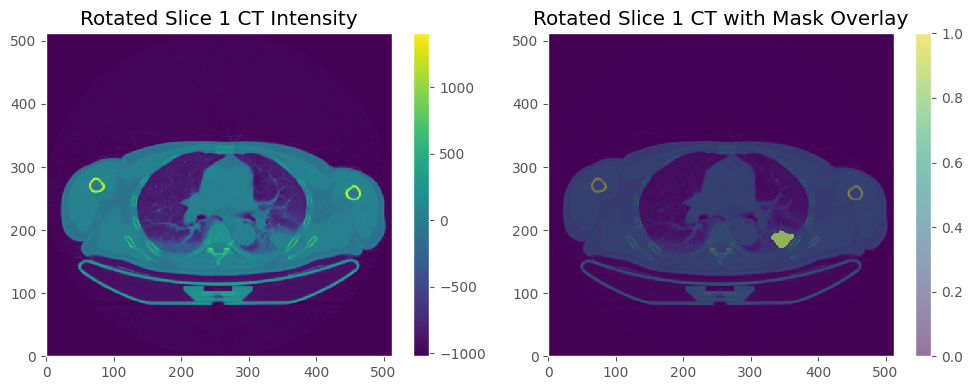

In [ ]:
import numpy as np

# Rotate slice 1 CT data 90 degrees to the left
rotated_slice_1_ct = np.rot90(slice_1_ct, k=3)

# Rotate mask overlay data (assuming it's called mask_1a) 90 degrees to the left
rotated_mask_1a = np.rot90(mask_1a, k=3)

# Show intensity of rotated slice 1 CT in a colorbar
masker = NiftiMasker()
masker.fit(CT_1)
plt.figure(figsize=(10, 4))  # Set the figure size to be taller

plt.subplot(1, 2, 1)
plt.pcolormesh(rotated_slice_1_ct)
plt.colorbar()
plt.title('Rotated Slice 1 CT Intensity')

plt.subplot(1, 2, 2)
plt.pcolormesh(rotated_slice_1_ct)
plt.pcolormesh(rotated_mask_1a, alpha=0.5)
plt.colorbar()
plt.title('Rotated Slice 1 CT with Mask Overlay')

plt.tight_layout()
plt.show()

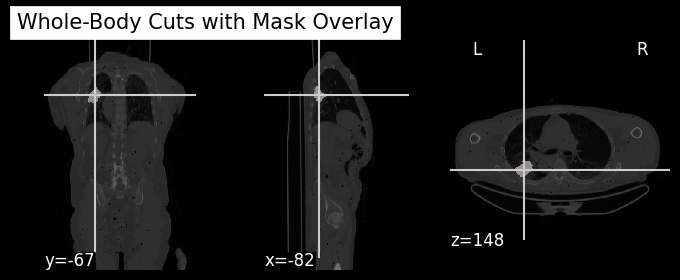

In [ ]:
import nibabel as nib
import matplotlib.pyplot as plt

# Load the anatomical image and mask using nibabel of CT
anatomical_image = CT_1
mask_image = Mask_CT_1

# Plotting the whole-body figure cuts with mask overlay
display = plotting.plot_roi(mask_image, bg_img=anatomical_image, cmap='Reds', alpha=0.5, display_mode='ortho',
                            cut_coords=None, colorbar=False, title='Whole-Body Cuts with Mask Overlay')

# Display the plot
plotting.show()

### **SVM e RF Models**

In [ ]:
# if this is not the first time you run the code, run from HERE
df = pd.read_csv('/content/drive/MyDrive/Master degree AI/Healthcare/masse_polmonarii.csv')
#df = df.drop(columns = 'Patient', axis = 1)
df

,PET_mask_volume,CT_mask_volume,Glucose,y
0,22.689873,11.577606,3.720814,1
1,4.783988,6.980281,9.007027,0
2,42.252070,24.291992,4.476632,1
3,3.866946,1.575470,1.389443,0
4,1.206219,1.185792,4.399799,0
5,40.991008,53.794618,13.328532,1
6,210.350480,156.993866,4.235270,1
7,42.479537,39.608002,3.600601,1
8,11.428416,39.516215,14.139402,0
9,60.790663,37.765503,5.740175,1


In [ ]:
# standard scaling of input features
from sklearn.preprocessing import StandardScaler
X = df.drop(columns = 'y', axis = 1)
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)
y = df['y']

hyperparameter tuning

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_norm, y, train_size=0.7, random_state=True)

In [ ]:
#svm and random forest to predict whether malignant or bening
from sklearn import svm
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_curve, auc, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import GridSearchCV
import time
from scipy import stats
import random
from contextlib import redirect_stdout

plt.style.use('ggplot')
def hyperparameter_tuning(X_train, X_test, y_train, y_test):
    svm_param_grid = {
        'C': [0.1, 1],
        'kernel': ['poly', 'rbf'],
       # 'gamma': ['scale', 'auto']
    }

    rf_param_grid = {
        'n_estimators': [5, 20],
        'max_depth': [2, 8]
    }
    #svm_param_grid = {'kernel':['poly', 'rbf', 'sigmoid'], 'C':[0.1, 1, 10], 'degree':[2, 3, 4], }
    #rf_param_grid = {'n_estimators':[50, 100, 200], 'max_depth':[None, 5, 10]}
    #to be faster, use a smaller grid:
    #svm_param_grid = {'kernel': ['poly', 'rbf'], 'C': [1, 10], 'degree': [2, 3]}
    #rf_param_grid = {'n_estimators': [50, 100], 'max_depth': [10, 20]}

    svm_grid_search = GridSearchCV(SVC(), svm_param_grid, scoring = 'accuracy')
    svm_grid_search.fit(X_train, y_train)

    rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_param_grid, scoring='accuracy')
    rf_grid_search.fit(X_train, y_train)

    best_svm_model = svm_grid_search.best_estimator_
    best_svm_params = svm_grid_search.best_params_

    best_rf_model = rf_grid_search.best_estimator_
    best_rf_params = rf_grid_search.best_params_


    svm_y_pred = best_svm_model.predict(X_val)
    svm_accuracy = accuracy_score(y_val, svm_y_pred)
    svm_precision = precision_score(y_val, svm_y_pred)
    svm_recall = recall_score(y_val, svm_y_pred)
    svm_f1 = f1_score(y_val, svm_y_pred)
    svm_confusion_matrix = confusion_matrix(y_val, svm_y_pred)

    rf_y_pred = best_rf_model.predict(X_val)
    rf_accuracy = accuracy_score(y_val, rf_y_pred)
    rf_precision = precision_score(y_val, rf_y_pred)
    rf_recall = recall_score(y_val, rf_y_pred)
    rf_f1 = f1_score(y_val, rf_y_pred)
    rf_confusion_matrix = confusion_matrix(y_val, rf_y_pred)

    metrics = ['Accuracy', 'Sensitivity', 'Specificity']
    svm_scores = [svm_accuracy, svm_recall, svm_precision]
    rf_scores = [rf_accuracy, rf_recall, rf_precision]

    x = np.arange(len(metrics))
    width = 0.35

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, svm_scores, width, label='SVM')
    rects2 = ax.bar(x + width/2, rf_scores, width, label='RF')

    ax.set_ylabel('Score')
    ax.set_xticks(x)
    #ax.set_yticks([0.70, 0.75, 0.80, 0.85, 0.90, 0.95, 1.00])
    ax.set_xticklabels(metrics)
    #ax.set_ylim([0.6, 1.0])
    ax.legend()

    fig.tight_layout()

    plt.show()

    if svm_accuracy > rf_accuracy:
        best_model_name = 'SVM'
        best_model_params = best_svm_params
    else:
        best_model_name = 'RF'
        best_model_params = best_rf_params

    return best_model_name, best_model_params, svm_confusion_matrix, rf_confusion_matrix


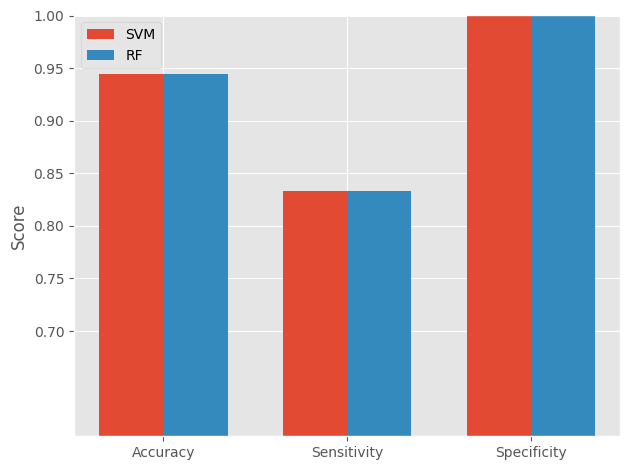

In [ ]:
best_model_name, best_model_params, svm_confusion_matrix, rf_confusion_matrix = hyperparameter_tuning(X_train, X_val, y_train, y_val)

In [ ]:
print('Best model:', best_model_name)
print('Best model params:', best_model_params)

Best model: RF
Best model params: {'max_depth': 2, 'n_estimators': 5}


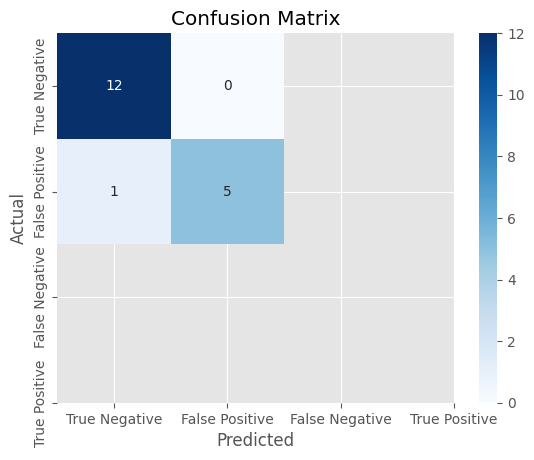

In [ ]:
#confusion matrix plot
import seaborn as sns
import matplotlib.pyplot as plt

labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# Create a heatmap plot
sns.heatmap(rf_confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

In [ ]:
#training the best model svm or rf after the dim. reduction
from sklearn.model_selection import KFold
#from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as rf
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def train_rf_with_pca(X_norm, y_train):
    pca = PCA(n_components=0.9)
    X_pca = pca.fit_transform(X_norm)    
    #svm = SVC(**dict(svm_params))
    rfc = rf(max_depth=10, n_estimators=50)  
    kfold = KFold(n_splits=5, shuffle=True, random_state=True)

    X_train, X_test = train_test_split(X_pca,train_size = 0.7, random_state=True)
    rfc.fit(X_train, y_train)

    return rfc, pca

In [ ]:
rfc, pca = train_rf_with_pca(X_norm=X_norm, y_train=y_train)

In [ ]:
from matplotlib.figure import Figure
X_test = pca.transform(X_val)
y_true = y_val
y_pred = rfc.predict(X_test)
proba = rfc.predict_proba(X_test)

#for confusion matrix
from sklearn.metrics import confusion_matrix as cm
tn, fp, fn, tp=cm(y_true,y_pred).ravel()

In [ ]:
#function that return a confusion matrix plot and a confusion matrix values in a matrix of array
from sklearn.metrics import ConfusionMatrixDisplay as CMD
from sklearn.metrics import confusion_matrix
    
def confusion_matrix_plot(y_true, y_pred, labels, model):
    tn, fp, fn, tp=confusion_matrix(y_true, y_pred).ravel()   
    cm = confusion_matrix(y_true, y_pred, labels=model.classes_)
    picture = CMD(confusion_matrix=cm, display_labels=model.classes_)
    picture.plot()
    plt.show()
    return picture, cm

In [ ]:
# patient 1 malignant = LCp0016 PET
PET_1 = nib.load('/content/drive/MyDrive/Master degree AI/Healthcare/CLASS1_MALIGNANT/LCp0016_biobank//LCp0016_PT_partition.nii')
Mask_PET_1 = nib.load('/content/drive/MyDrive/Master degree AI/Healthcare/CLASS1_MALIGNANT/LCp0016_biobank//LCp0016_PT_mask.nii')

pet_data = PET_1.get_fdata() #fdata to obtain numpy array of the image, then of the mask too
pet_mask_data = Mask_PET_1.get_fdata()

In [ ]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np
import skimage.measure as measure

def plot_3d(image, threshold = -300): 
    p = image.transpose(2, 1, 0)
    verts, faces, normals, values = measure.marching_cubes(p, threshold)
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(111, projection='3d')
    mesh = Poly3DCollection(verts[faces], alpha=0.1)
    face_color = [1, 0, 0]
    mesh.set_facecolor(face_color)
    ax.add_collection3d(mesh)
    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(0, p.shape[2])

    plt.show()

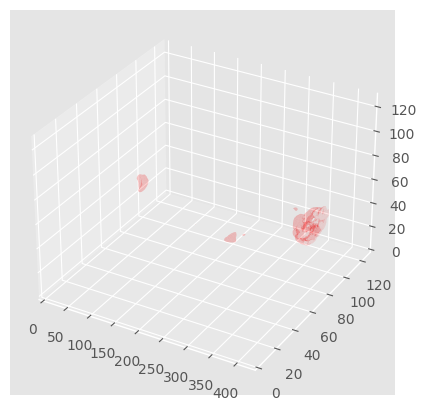

In [ ]:
# create a 3D cube with voxel values bigger than the threshold
# failing to isolate the tumoral mass
plot_3d(pet_data, threshold=5)

#RADIOMICS

**Radiomics** is the process of quantitative properties extraction (named features) from an image or from a specifed ROI (region of interest) identified in an image manually or automatically.

Feature extraction activity is typically realized by means of pattern recognition algorithms and provides, as a result, a set of numbers, each one representing a quantitative description of a specifiic either geometrical or physical property of the image portion under consideration.

Radiomics purpose in diagnosis: increasing the accuracy (benign vs malignant), enhancing the possibility of classify different malignant lesions

key steps: converting .nii images to greyscale, then you can extract the features (they're many so pick a subset) from every PET and CT scans applied to the respective mask. 

PCA to reduce dimensionality and then classification

she expects, but not mandatory: comparison between svm, rf, and the simple (1 hidden layer) NN with the same input. ROC curve suggested

first use her input features, then extract features, then (not mandatory) using the image of the tumor as deep learning approach for example with resnet.

masks as labels, predict the segments (semantic segmentation). U can use dice and unet for predicting (not using malignant/benign information if u use unet, u should use the labels as masks)

https://github.com/ovh/ai-training-examples/blob/main/notebooks/computer-vision/image-segmentation/tensorflow/brain-tumor-segmentation-unet/notebook_image_segmentation_unet.ipynb

https://keras.io/examples/vision/deeplabv3_plus/

In [ ]:
!pip install pyradiomics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 32.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.6/485.6 kB 40.0 MB/s eta 0:00:00
  Created wheel for pyradiomics: filename=pyradiomics-3.0.1-cp310-cp310-linux_x86_64.whl size=186209 sha256=a6e176cb0a63c644db06c364e2ac259186bd13fd7ce316d97657b11d0628b901
  Stored in directory: /root/.cache/pip/wheels/91/c5/13/c5fd4c5ad3edf4062bb3855bd66fad25871c9c6dc0b3fda544
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13707 sha256=db613b233596906fb15e7641e17ab5932db08e36158af9a2413192c2d9d90ad1
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da20

In [ ]:
#import libraries for radiomics 
from __future__ import print_function
import sys
import logging
import radiomics
from radiomics import featureextractor 
from __future__ import print_function
import six # for iteratios
import os  # needed navigate the system to get the input data
from radiomics.featureextractor import RadiomicsFeatureExtractor


In [ ]:
# loading ct and mask paths of patient 1
CT_imagepath = '/content/drive/MyDrive/Master degree AI/Healthcare/CLASS1_MALIGNANT/LCp0016_biobank/LCp0016_CT_partition.nii'
CT_maskpath = '/content/drive/MyDrive/Master degree AI/Healthcare/CLASS1_MALIGNANT/LCp0016_biobank/LCp0016_CT_mask.nii'

PET_imagepath='/content/drive/MyDrive/Master degree AI/Healthcare/CLASS1_MALIGNANT/LCp0016_biobank//LCp0016_PT_partition.nii'
PET_maskpath='/content/drive/MyDrive/Master degree AI/Healthcare/CLASS1_MALIGNANT/LCp0016_biobank//LCp0016_PT_mask.nii'

In [ ]:
!pip install --upgrade radiomics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for radiomics: filename=radiomics-0.1-py3-none-any.whl size=6091 sha256=c80679ded80eabac06e3d33b4ced60629115feb0367706136986ed19b371e622
  Stored in directory: /root/.cache/pip/wheels/72/f5/9b/32efc9afd085f158d92202cb88e07ddd5793ea549381868b29
Successfully built radiomics


In [ ]:

extractor = featureextractor.RadiomicsFeatureExtractor()

INFO:radiomics.featureextractor:No valid config parameter, using defaults: {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}
INFO:radiomics.featureextractor:Enabled image types: {'Original': {}}
INFO:radiomics.featureextractor:Enabled features: {'firstorder': [], 'glcm': [], 'gldm': [], 'glrlm': [], 'glszm': [], 'ngtdm': [], 'shape': []}


In [ ]:
# Instantiate the extractor
extractor = RadiomicsFeatureExtractor()

#print('Extraction parameters:\n\t', extractor.settings)
#print('Enabled filters:\n\t', extractor._enabledImagetypes)
#print('Enabled features:\n\t', extractor._enabledFeatures)

INFO:radiomics.featureextractor:No valid config parameter, using defaults: {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}
INFO:radiomics.featureextractor:Enabled image types: {'Original': {}}
INFO:radiomics.featureextractor:Enabled features: {'firstorder': [], 'glcm': [], 'gldm': [], 'glrlm': [], 'glszm': [], 'ngtdm': [], 'shape': []}


In [ ]:
benign_dir = '/content/drive/MyDrive/Master degree AI/Healthcare/CLASS2_BENIGN'
malign_dir = '/content/drive/MyDrive/Master degree AI/Healthcare/CLASS1_MALIGNANT'

malignant = [f.path for f in os.scandir(malign_dir) if f.is_dir()]
benign = [f.path for f in os.scandir(benign_dir) if f.is_dir()]

malignant = sorted(malignant)
benign = sorted(benign)
print(malignant)

['/content/drive/MyDrive/Master degree AI/Healthcare/CLASS1_MALIGNANT/LCp0016_biobank', '/content/drive/MyDrive/Master degree AI/Healthcare/CLASS1_MALIGNANT/LCp0020_biobank', '/content/drive/MyDrive/Master degree AI/Healthcare/CLASS1_MALIGNANT/LCp0023_biobank', '/content/drive/MyDrive/Master degree AI/Healthcare/CLASS1_MALIGNANT/LCp0026_biobank', '/content/drive/MyDrive/Master degree AI/Healthcare/CLASS1_MALIGNANT/LCp0027_biobank', '/content/drive/MyDrive/Master degree AI/Healthcare/CLASS1_MALIGNANT/LCp0028_biobank', '/content/drive/MyDrive/Master degree AI/Healthcare/CLASS1_MALIGNANT/LCp0035_biobank', '/content/drive/MyDrive/Master degree AI/Healthcare/CLASS1_MALIGNANT/LCp0038_biobank', '/content/drive/MyDrive/Master degree AI/Healthcare/CLASS1_MALIGNANT/LCp0041_biobank', '/content/drive/MyDrive/Master degree AI/Healthcare/CLASS1_MALIGNANT/LCp0045_biobank', '/content/drive/MyDrive/Master degree AI/Healthcare/CLASS1_MALIGNANT/LCp0046_biobank', '/content/drive/MyDrive/Master degree AI/H

In [ ]:
import SimpleITK as sitk
import pandas as pd
import os
# Create an empty dataframe to store the pet-features
features_df = pd.DataFrame()
benign_dir = '/content/drive/MyDrive/Master degree AI/Healthcare/CLASS2_BENIGN'
malign_dir = '/content/drive/MyDrive/Master degree AI/Healthcare/CLASS1_MALIGNANT'
malignant = [f.path for f in os.scandir(malign_dir) if f.is_dir()]
benign = [f.path for f in os.scandir(benign_dir) if f.is_dir()]
malignant = sorted(malignant)
benign = sorted(benign)
# Loop through each patient
for patient in malignant + benign:
    patient_id = os.path.basename(patient)[:7]
    ct_scan_path = os.path.join(patient, f"{patient_id}_PT_partition.nii")
    ct_mask_path = os.path.join(patient, f"{patient_id}_PT_mask.nii")
    # Perform segment-based feature extraction
    result = extractor.execute(ct_scan_path, ct_mask_path, voxelBased=False)
    # Create a dictionary to store the patient's feature values
    patient_features = {'Patient': patient}
    # Loop through the calculated features
    for key, value in six.iteritems(result):
        # Check if the key is 'diagnostics' (which contains information about the extraction settings)
        if key == 'diagnostics':
            # Extract the feature names from the 'diagnostics' dictionary
            feature_names = value['feature_names']           
            # Generate column names for the dataframe
            column_names = ['Patient'] + feature_names          
            # Set the column names for the dataframe
            if not features_df.columns.tolist():  # Check if column names are not set yet
                features_df.columns = column_names
        else:
            # Add the feature value to the patient's dictionary
            patient_features[key] = value   
    # Append the patient's feature values to the dataframe as a new row
    features_df = features_df.append(patient_features, ignore_index=True)
# Save the dataframe to a CSV file
features_df.to_csv('/content/drive/MyDrive/Master degree AI/Healthcare/featuresCT.csv', index=False)

INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
INFO:radiomics.featureextractor:Computing shape
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder
INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
<ipython-input-41-6205281b528a>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(patient_features, ignore_index=True)
INFO:radiomics.featureextractor:Calculating fe

In [ ]:
m = np.zeros((30, 1), dtype = np.int8)
n = np.ones((30, 1), dtype = np.int8)
y = np.append(m, n)

In [ ]:
import SimpleITK as sitk
import pandas as pd
import os
# Create an empty dataframe to store the pet-features
pet_features_df = pd.DataFrame()
benign_dir = '/content/drive/MyDrive/Master degree AI/Healthcare/CLASS2_BENIGN'
malign_dir = '/content/drive/MyDrive/Master degree AI/Healthcare/CLASS1_MALIGNANT'
malignant = [f.path for f in os.scandir(malign_dir) if f.is_dir()]
benign = [f.path for f in os.scandir(benign_dir) if f.is_dir()]
malignant = sorted(malignant)
benign = sorted(benign)
# Loop through each patient
for patient in malignant + benign:
    patient_id = os.path.basename(patient)[:7]
    pet_scan_path = os.path.join(patient, f"{patient_id}_PT_partition.nii")
    pet_mask_path = os.path.join(patient, f"{patient_id}_PT_mask.nii")
    # Perform segment-based feature extraction
    result = extractor.execute(pet_scan_path, pet_mask_path, voxelBased=False)
    # Create a dictionary to store the patient's feature values
    patient_features = {'Patient': patient}
    # Loop through the calculated features
    for key, value in six.iteritems(result):
        # Check if the key is 'diagnostics' (which contains information about the extraction settings)
        if key == 'diagnostics':
            # Extract the feature names from the 'diagnostics' dictionary
            feature_names = value['feature_names']           
            # Generate column names for the dataframe
            column_names = ['Patient'] + feature_names          
            # Set the column names for the dataframe
            if not pet_features_df.columns.tolist():  # Check if column names are not set yet
                pet_features_df.columns = column_names
        else:
            # Add the feature value to the patient's dictionary
            patient_features[key] = value   
    # Append the patient's feature values to the dataframe as a new row
    pet_features_df = pet_features_df.append(patient_features, ignore_index=True)

# Save the dataframe to a CSV file and 
pet_features_df.to_csv('/content/drive/MyDrive/Master degree AI/Healthcare/featuresPET.csv', index=False)
pet_features_df['target'] = y
features_df['target'] = y
all_features = features_df.append(pet_features_df)
#all_features['target'] = y
all_features = all_features.sample(frac = 1)
all_features.reset_index()
all_features.to_csv('/content/drive/MyDrive/Master degree AI/Healthcare/featuresCT-PET.csv', index=False)

INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
INFO:radiomics.featureextractor:Computing shape
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder
INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
<ipython-input-33-afef65a21415>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pet_features_df = pet_features_df.append(patient_features, ignore_index=True)
INFO:radiomics.featureextractor:Calcul

In [ ]:
pet_features_df.to_csv('/content/drive/MyDrive/Master degree AI/Healthcare/featuresPET.csv', index=False)
pet_features_df['target'] = y
features_df['target'] = y
all_features = features_df.append(pet_features_df)
#all_features['target'] = y
all_features = all_features.sample(frac = 1)
all_features.reset_index()
all_features.to_csv('/content/drive/MyDrive/Master degree AI/Healthcare/featuresCT-PET.csv', index=False)

<ipython-input-29-8f13a397e708>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_features = features_df.append(pet_features_df)


In [ ]:
M = np.zeros((30, 1), dtype = np.int8)
N = np.ones((30, 1), dtype = np.int8)
y=np.append(M,N)

pet_features_df.to_csv('/content/drive/MyDrive/Master degree AI/Healthcare/featuresPET.csv', index=False)
pet_features_df['target'] = y
features_df['target'] = y
all_features = features_df.append(pet_features_df)
#
all_features = all_features.sample(frac = 1)
all_features.reset_index()
all_features.to_csv('/content/drive/MyDrive/Master degree AI/Healthcare/featuresCT-PET.csv', index=False)

<ipython-input-42-9920863e9a61>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_features = features_df.append(pet_features_df)


In [ ]:
all_features

,Patient,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,diagnostics_Image-original_Hash,diagnostics_Image-original_Dimensionality,...,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,target
57,/content/drive/MyDrive/Master degree AI/Health...,v3.0.1,1.22.4,2.2.1,1.4.1,3.10.11,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},7776e9a00e85fb6a57e0f9be9a078d77534f92de,3D,...,0.00011562030292519366,-3.203426503814917e-16,0.010752688172043012,0.0,0.0,1000000.0,0.0,0.0,0.0,1
6,/content/drive/MyDrive/Master degree AI/Health...,v3.0.1,1.22.4,2.2.1,1.4.1,3.10.11,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},aa4dd228ae570c2ac974e6213823938f0613b2d4,3D,...,1.8595099335950407e-07,-3.203426503814917e-16,0.00043122035360068997,0.0,0.0,1000000.0,0.0,0.0,0.0,0
23,/content/drive/MyDrive/Master degree AI/Health...,v3.0.1,1.22.4,2.2.1,1.4.1,3.10.11,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},a2b91f70bafc67099c5db1bc0bfe6d5dbeba4688,3D,...,2.2343323033061413e-06,-3.203426503814917e-16,0.0014947683109118087,0.0,0.0,1000000.0,0.0,0.0,0.0,0
27,/content/drive/MyDrive/Master degree AI/Health...,v3.0.1,1.22.4,2.2.1,1.4.1,3.10.11,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},807de458f825c4da03df4d51918c54ab5e45bbf2,3D,...,1.8114334053680018e-06,-3.203426503814917e-16,0.0013458950201884253,0.0,0.0,1000000.0,0.0,0.0,0.0,0
2,/content/drive/MyDrive/Master degree AI/Health...,v3.0.1,1.22.4,2.2.1,1.4.1,3.10.11,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},6b62b03d266222127ac215a092753115a445920c,3D,...,0.3703706006987703,1.5849625007211552,0.0024855012427506215,320534.22222222225,0.0,1000000.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,/content/drive/MyDrive/Master degree AI/Health...,v3.0.1,1.22.4,2.2.1,1.4.1,3.10.11,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},0311b3b9960a4577c60436ebc4b6208d0d4f2fc7,3D,...,3.2116750812553794e-06,-3.203426503814917e-16,0.0017921146953405018,0.0,0.0,1000000.0,0.0,0.0,0.0,1
10,/content/drive/MyDrive/Master degree AI/Health...,v3.0.1,1.22.4,2.2.1,1.4.1,3.10.11,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},40728bf46b9cb18a0abdcb621c6718ff60c35566,3D,...,0.5000031564859473,0.9999999999999993,0.005012531328320802,39402.25,0.0,1000000.0,0.0,0.0,0.0,0
32,/content/drive/MyDrive/Master degree AI/Health...,v3.0.1,1.22.4,2.2.1,1.4.1,3.10.11,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},e3511fbfaee656fb8ad461d7066c5daf450f9bc8,3D,...,6.7465002529937596e-06,-3.203426503814917e-16,0.0025974025974025974,0.0,0.0,1000000.0,0.0,0.0,0.0,1
34,/content/drive/MyDrive/Master degree AI/Health...,v3.0.1,1.22.4,2.2.1,1.4.1,3.10.11,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},0dcfe46e6fe8798fd170d5413bb5290ef7cddf5e,3D,...,3.7637848620572846e-05,-3.203426503814917e-16,0.006134969325153374,0.0,0.0,1000000.0,0.0,0.0,0.0,1


In [ ]:
# reading the dataframe containing the features
feat = pd.read_csv('/content/drive/MyDrive/Master degree AI/Healthcare/featuresCT-PET.csv')
m = np.zeros((60, 1), dtype = np.int8)
n = np.ones((60, 1), dtype = np.int8)
y = np.append(m, n)
feat['target'] = y
feat = feat.sample(frac = 1)
feat.reset_index()

,index,Patient,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,diagnostics_Image-original_Hash,...,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,target
0,59,/content/drive/MyDrive/Master degree AI/Health...,v3.0.1,1.22.4,2.2.1,1.4.1,3.10.11,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},710acb743552b0ea18909f477b035e08f92babbd,...,2.558507e-07,-3.203427e-16,0.000506,0.000000,0.0,1000000.0,0.0,0.0,0.0,0
1,95,/content/drive/MyDrive/Master degree AI/Health...,v3.0.1,1.22.4,2.2.1,1.4.1,3.10.11,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},4c85219e37cbeaa931543c83bed181bb51be5337,...,6.666804e-01,9.182958e-01,0.018987,5338.888889,0.0,1000000.0,0.0,0.0,0.0,1
2,34,/content/drive/MyDrive/Master degree AI/Health...,v3.0.1,1.22.4,2.2.1,1.4.1,3.10.11,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},a58688c4efec1ef59eb690a4d19ee3d2ac40152c,...,1.212909e-06,-3.203427e-16,0.001101,0.000000,0.0,1000000.0,0.0,0.0,0.0,0
3,44,/content/drive/MyDrive/Master degree AI/Health...,v3.0.1,1.22.4,2.2.1,1.4.1,3.10.11,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},dc14657ba4eb93463a99dcf7ec423289cdfd1549,...,2.872738e-04,-3.203427e-16,0.016949,0.000000,0.0,1000000.0,0.0,0.0,0.0,0
4,25,/content/drive/MyDrive/Master degree AI/Health...,v3.0.1,1.22.4,2.2.1,1.4.1,3.10.11,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},807de458f825c4da03df4d51918c54ab5e45bbf2,...,1.811433e-06,-3.203427e-16,0.001346,0.000000,0.0,1000000.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,/content/drive/MyDrive/Master degree AI/Health...,v3.0.1,1.22.4,2.2.1,1.4.1,3.10.11,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},aa4dd228ae570c2ac974e6213823938f0613b2d4,...,1.859510e-07,-3.203427e-16,0.000431,0.000000,0.0,1000000.0,0.0,0.0,0.0,0
116,17,/content/drive/MyDrive/Master degree AI/Health...,v3.0.1,1.22.4,2.2.1,1.4.1,3.10.11,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},ff41c5c19976e0a0f6f26bb08f96425537f3c975,...,2.058422e-06,-3.203427e-16,0.001435,0.000000,0.0,1000000.0,0.0,0.0,0.0,0
117,111,/content/drive/MyDrive/Master degree AI/Health...,v3.0.1,1.22.4,2.2.1,1.4.1,3.10.11,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},76af256e16f0d42da38a497a8f4f379044a05a11,...,3.302946e-05,-3.203427e-16,0.005747,0.000000,0.0,1000000.0,0.0,0.0,0.0,1
118,27,/content/drive/MyDrive/Master degree AI/Health...,v3.0.1,1.22.4,2.2.1,1.4.1,3.10.11,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},8f15044df833e688c40f646930a2fe8ca08fae32,...,8.750736e-07,-3.203427e-16,0.000935,0.000000,0.0,1000000.0,0.0,0.0,0.0,0


In [ ]:
feat.shape

(120, 131)

In [ ]:
X = feat.drop('target', axis=1)
Y = feat['target']
#keeping float and integer features only
X = X.select_dtypes(include=['float', 'int'])
X

,diagnostics_Image-original_Mean,diagnostics_Image-original_Minimum,diagnostics_Image-original_Maximum,diagnostics_Mask-original_VoxelNum,diagnostics_Mask-original_VolumeNum,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
59,0.106134,0.0,63.352247,1977,1,0.881307,0.775721,34.530903,44.514601,49.294646,...,2.558507e-07,2.558507e-07,-3.203427e-16,0.000506,0.000000,0.0,1000000.0,0.0,0.0,0.0
95,0.099042,0.0,60.598413,158,3,0.784480,0.622433,19.107907,30.698761,29.239268,...,6.666804e-01,6.666804e-01,9.182958e-01,0.018987,5338.888889,0.0,1000000.0,0.0,0.0,0.0
34,0.143336,0.0,34.430739,908,1,0.911440,0.683786,34.040708,49.782687,52.793062,...,1.212909e-06,1.212909e-06,-3.203427e-16,0.001101,0.000000,0.0,1000000.0,0.0,0.0,0.0
44,0.126394,0.0,55.640834,59,1,0.667845,0.529054,8.811769,16.655708,12.228497,...,2.872738e-04,2.872738e-04,-3.203427e-16,0.016949,0.000000,0.0,1000000.0,0.0,0.0,0.0
25,0.166269,0.0,26.452520,743,1,0.579420,0.478858,28.986149,60.531882,44.797719,...,1.811433e-06,1.811433e-06,-3.203427e-16,0.001346,0.000000,0.0,1000000.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,0.111883,0.0,64.349023,2319,1,0.830679,0.697866,34.089984,48.848925,47.832027,...,1.859510e-07,1.859510e-07,-3.203427e-16,0.000431,0.000000,0.0,1000000.0,0.0,0.0,0.0
17,0.084592,0.0,31.651895,697,1,0.852398,0.699978,31.563423,45.092002,43.858902,...,2.058422e-06,2.058422e-06,-3.203427e-16,0.001435,0.000000,0.0,1000000.0,0.0,0.0,0.0
111,0.136564,0.0,54.973177,174,1,0.693676,0.585837,13.534308,23.102509,19.906550,...,3.302946e-05,3.302946e-05,-3.203427e-16,0.005747,0.000000,0.0,1000000.0,0.0,0.0,0.0
27,0.141535,0.0,35.775625,1069,1,0.898523,0.751940,38.178451,50.773242,59.359947,...,8.750736e-07,8.750736e-07,-3.203427e-16,0.000935,0.000000,0.0,1000000.0,0.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
# 90% variance -> 7 features
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.90)
feat4pca = pca.fit_transform(X)
feat4pca.shape

(120, 7)

In [ ]:
feat4pca

array([[ 6.22710474e-01, -1.38684685e+00, -4.76440306e-01,
         1.31124363e-01, -2.10023738e-01,  6.53524132e-02,
         1.85120474e-01],
       [-9.30513957e-01,  9.91607116e-01,  1.40196218e+00,
        -7.81164747e-01, -9.52942473e-01,  8.18775018e-01,
         3.66560458e-01],
       [ 2.32679039e-01, -6.72389121e-01, -9.08141071e-02,
         2.56488948e-01, -1.48998690e-01, -3.81274266e-02,
        -7.68933420e-02],
       [-1.46349336e+00,  1.09144900e+00, -1.91970703e-01,
        -2.04196070e-01,  2.98761610e-01,  1.44298729e-01,
         6.38401167e-01],
       [-2.40552271e-02, -4.39616442e-01,  1.48771083e-01,
         2.21892405e-01, -2.08904375e-02, -3.55748454e-01,
        -3.31019796e-01],
       [-6.72772574e-03, -6.45056647e-01, -2.26423641e-01,
         1.96775573e-01, -2.62276649e-01, -1.94519232e-01,
        -1.55208791e-01],
       [-1.06107315e+00,  5.49772804e-01, -4.41147543e-01,
        -9.21139002e-02,  1.62182950e-02,  2.19947308e-01,
         3.3611249

In [ ]:
# features in importance order
result = extractor.execute(CT_imagepath, CT_maskpath)
variance_ratio = pca.explained_variance_ratio_

# getting feature names
feature_names = list(result.keys())

# creating a list with features and variance
feat_variances = [(feat, var) for feat, var in zip(feature_names, pca.explained_variance_ratio_)]

# ordina la lista in ordine decrescente di varianza
feat_variances_sorted = sorted(feat_variances, key=lambda x: x[1], reverse=True)

# printa le feature e la relativa varianza in ordine di importanza
for feat, var in feat_variances_sorted:
    print(feat, var)

INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
INFO:radiomics.featureextractor:Computing shape
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder
INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm


diagnostics_Versions_PyRadiomics 0.41080367567271375
diagnostics_Versions_Numpy 0.2077352330612983
diagnostics_Versions_SimpleITK 0.12183552935439833
diagnostics_Versions_PyWavelet 0.05641177044722232
diagnostics_Versions_Python 0.05403314896863771
diagnostics_Configuration_Settings 0.03903903605952056
diagnostics_Configuration_EnabledImageTypes 0.019685332161604462


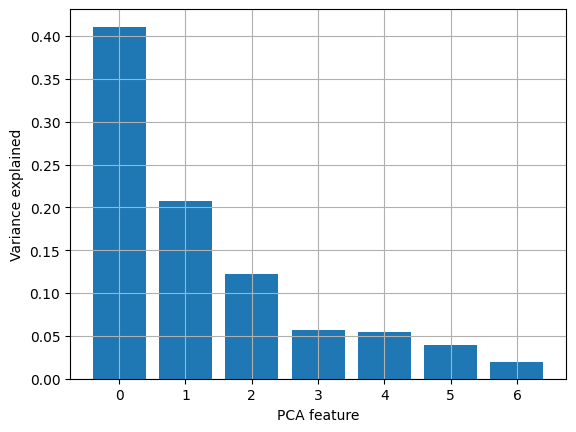

In [ ]:
#plot variances
plt.bar(range(len(variance_ratio)), variance_ratio)
plt.xlabel('PCA feature')
plt.ylabel('Variance explained')
plt.grid()
plt.show()

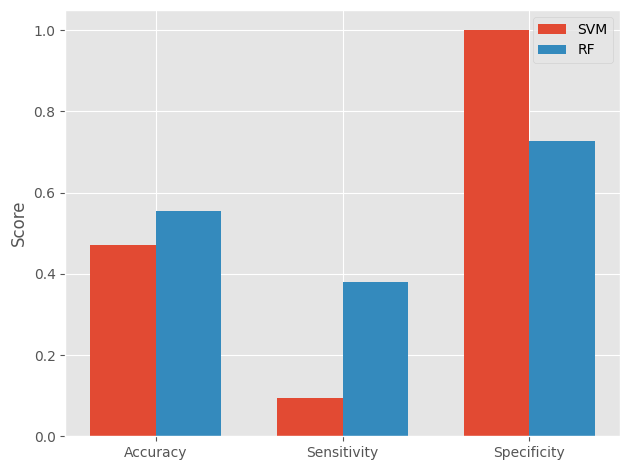

In [ ]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import KFold
#from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as rf
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# training with the best model
X_train, X_val, y_train, y_val  = train_test_split(feat4pca, Y, train_size = 0.7, random_state=True)
hyperparameter_tuning(X_train, X_val, y_train, y_val) 


def train_rf(X_norm, y_train):   
    #svm = SVC(**dict(svm_params))
    rfc = rf(max_depth=10, n_estimators=50)  
    kfold = KFold(n_splits=5, shuffle=True, random_state=True)
    X_train, X_test = train_test_split(feat4pca, train_size = 0.7, random_state=True)
    rfc.fit(X_train, y_train)

    return rfc

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


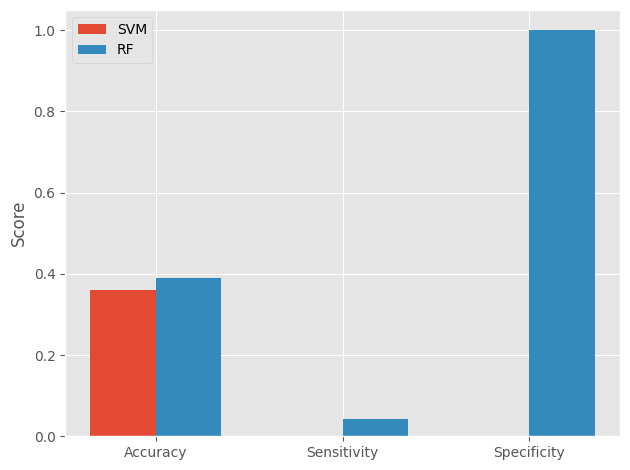

{'max_depth': 2, 'n_estimators': 1}

In [ ]:
best_model_name, best_model_params, svm_confusion_matrix, rf_confusion_matrix = hyperparameter_tuning(X_train, X_val, y_train, y_val)

best_model_params

In [ ]:
trained_rfc=train_rf(X_train, y_train)
trained_rfc

RandomForestClassifier(max_depth=10, n_estimators=50)

In [ ]:
y_pred = trained_rfc.predict(X_val)
proba = trained_rfc.predict_proba(X_val)
confusion_matrix(y_val, y_pred)#rename thee function!!!!!!!!!!!!!!!!!!!!!

array([[ 9,  4],
       [13, 10]])

In [ ]:
rf_confusion_matrix

In [ ]:
'''from sklearn.metrics import ConfusionMatrixDisplay as CMD
cm = cm(Y_val, y_pred, labels=S_vc.classes_)
disp = CMD(confusion_matrix=cm, display_labels=S_vc.classes_)
disp.plot()
plt.show()
'''


# Simple **Neural network**: 1 hidden layer



In [ ]:
#pytorch nn
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

def network_defiition(X_train, y_train, num_epochs=100, batch_size=32, learning_rate=0.001, hidden_size=64):
    from keras.models import Sequential
    from keras.layers import Dense
    model = Sequential()
    model.add(Dense(8, activation='relu', input_dim=7))#CHAGE TO YOUR nUMBER OF FEATURES
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    return model

In [ ]:
neural=network_defiition(X_train, y_train, num_epochs=300)
neural.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
neural.fit(X_train, y_train, epochs=300, batch_size=16, verbose=1)

Epoch 1/300
6/6 [==============================] - 1s 3ms/step - loss: 0.7623 - accuracy: 0.5000
Epoch 2/300
6/6 [==============================] - 0s 3ms/step - loss: 0.7483 - accuracy: 0.5119
Epoch 3/300
6/6 [==============================] - 0s 3ms/step - loss: 0.7365 - accuracy: 0.5119
Epoch 4/300
6/6 [==============================] - 0s 3ms/step - loss: 0.7261 - accuracy: 0.5238
Epoch 5/300
6/6 [==============================] - 0s 3ms/step - loss: 0.7170 - accuracy: 0.5357
Epoch 6/300
6/6 [==============================] - 0s 4ms/step - loss: 0.7091 - accuracy: 0.5238
Epoch 7/300
6/6 [==============================] - 0s 3ms/step - loss: 0.7015 - accuracy: 0.5476
Epoch 8/300
6/6 [==============================] - 0s 4ms/step - loss: 0.6941 - accuracy: 0.5595
Epoch 9/300
6/6 [==============================] - 0s 4ms/step - loss: 0.6892 - accuracy: 0.5952
Epoch 10/300
6/6 [==============================] - 0s 3ms/step - loss: 0.6845 - accuracy: 0.6071
Epoch 11/300
6/6 [===========

In [ ]:
neural.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 64        
                                                                 
 dense_4 (Dense)             (None, 8)                 72        
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________


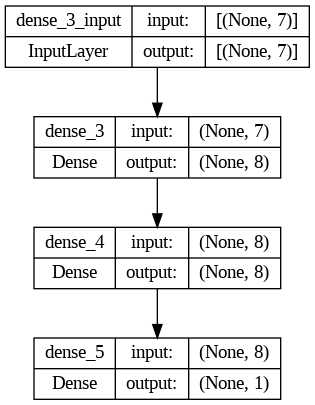

In [ ]:
from keras.utils import plot_model
plot_model(neural, to_file='/tmp/model.png', show_shapes=True)

In [ ]:
y_pred = neural.predict(X_val)

2/2 [==============================] - 0s 8ms/step


In [ ]:
#accuracy model 
score = neural.evaluate(X_val, y_val,verbose=1)
print(score)

2/2 [==============================] - 0s 9ms/step - loss: 0.7285 - accuracy: 0.6389
[0.7284557223320007, 0.6388888955116272]


In [ ]:
from sklearn.metrics import auc, roc_curve
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_val, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)

from sklearn.ensemble import RandomForestClassifier
# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=10)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict_proba(X_val)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_val, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)

AUC is the percentage of this area that is under this ROC (Receiver operating characteristic) curve, ranging between 0~1.  

What can they do?

ROC is a great way to visualize the performance of a binary classifier, and AUC is one single number to summarize a classifier's performance by assessing the ranking regarding separation of the two classes. The higher, the better.

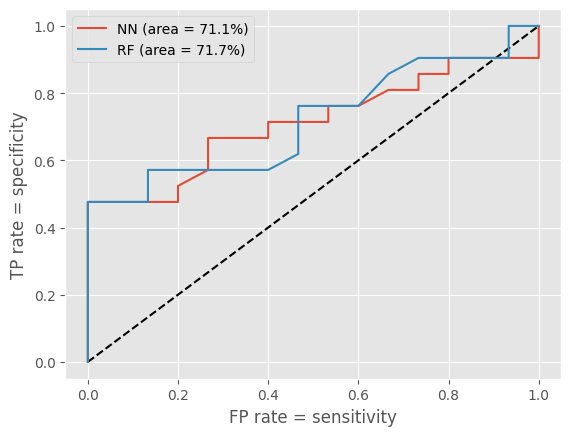

In [ ]:
#def plot_roc_NNrf():
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='NN (area = {:.1f}%)'.format(auc_keras*100))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.1f}%)'.format(auc_rf*100))
plt.xlabel('FP rate = sensitivity')
plt.ylabel('TP rate = specificity')
plt.legend(loc='best')
plt.show()

comparison with the best model (rfc or svc) previously run

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# nn predicitions
y_pred_nn = neural.predict(X_val)

# rfc predicitions
rf = RandomForestClassifier(max_depth=3, n_estimators=10)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict_proba(X_val)[:, 1]

# nn metrics
acc_nn = accuracy_score(y_val, y_pred_nn)
prec_nn = precision_score(y_val, y_pred_nn)
rec_nn = recall_score(y_val, y_pred_nn)
f1_nn = f1_score(y_val, y_pred_nn)
auc_nn = roc_auc_score(y_val, y_pred_nn)

# rfc metrics
acc_rf = accuracy_score(y_val, y_pred_rf)
prec_rf = precision_score(y_val, y_pred_rf)
rec_rf = recall_score(y_val, y_pred_rf)
f1_rf = f1_score(y_val, y_pred_rf)
auc_rf = roc_auc_score(y_val, y_pred_rf)

# svm metrics


# printing the results in terms of metrics
print("Neural Network - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-score: {:.4f}, AUC-ROC: {:.4f}".format(acc_nn, prec_nn, rec_nn, f1_nn, auc_nn))
print("Random Forest - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-score: {:.4f}, AUC-ROC: {:.4f}".format(acc_rf, prec_rf, rec_rf, f1_rf, auc_rf))

2/2 [==============================] - 0s 9ms/step


ValueError: ignored

# segmentation cnn
https://colab.research.google.com/github/usuyama/pytorch-unet/blob/master/pytorch_unet_resnet18_colab.ipynb#scrollTo=bY0Vk2VDCAiz

In [ ]:
# converting all the malignant images from .nii(nifti) to greyscale

from sklearn.preprocessing import MinMaxScaler
import skimage.color 
import nibabel as nib
from skimage.color import rgb2gray

scalerM = MinMaxScaler(feature_range=(0, 255))

malignant = [f.path for f in os.scandir(malign_dir) if f.is_dir()]
benign = [f.path for f in os.scandir(benign_dir) if f.is_dir()]

malignant = sorted(malignant)
benign = sorted(benign)

num_patients = 30
patient_count = 0
ds_gray=[]
for patient in malignant:
   
    patient_id = os.path.basename(patient)[:7]
    pet_scan_path = os.path.join(patient, f"{patient_id}_PT_partition.nii") #.nii 0-400, pt 0-255, ct 0-255 images.
    pet_mask_path = os.path.join(patient, f"{patient_id}_PT_mask.nii") # .nii 0-400, pt 0-400, ct 0-255 slices.
    ct_scan_path = os.path.join(patient, f"{patient_id}_CT_partition.nii")
    ct_mask_path = os.path.join(patient, f"{patient_id}_CT_mask.nii")

    pet_scan = nib.load(pet_scan_path)
    pet_mask = nib.load(pet_mask_path)
    ct_scan = nib.load(ct_scan_path)
    ct_mask = nib.load(ct_mask_path)

    pet_voxel_size = pet_scan.header.get_zooms()
    pet_scan_data = pet_scan.get_fdata()
    pet_mask_data = pet_mask.get_fdata()

    ct_voxel_size = ct_scan.header.get_zooms()
    ct_scan_data = ct_scan.get_fdata()
    ct_mask_data = ct_mask.get_fdata()

    # applica lo scaler ai dati dell'immagine 2d che viene convertita in 2d per essere trattata dallo scaler
    img_data_normalized = scalerM.fit_transform(pet_scan_data.reshape(pet_scan_data.shape[0], -1))
    img_data_rgb = skimage.color.gray2rgb(img_data_normalized)
    # crea un'immagine nibabel dai dati normalizzati
    #img_normalized = nib.Nifti1Image(img_data_normalized, pet_scan.affine)
    img_data_gray = skimage.color.rgb2gray(img_data_rgb)
    #pet_mask_volume = np.sum(pet_mask_data == 1) * pet_voxel_size[0] * pet_voxel_size[1] * pet_voxel_size[2] / 1000
    #ct_mask_volume = np.sum(ct_mask_data == 1) * ct_voxel_size[0] * ct_voxel_size[1] * ct_voxel_size[2] / 1000
    #glucose = pet_scan_data[pet_mask_data.astype(bool)].mean()
 
    #print(f"Patient {patient_id} pet mask volume: {pet_mask_volume:.2f} cm^3, ct mask volume: {ct_mask_volume.round(2)} cm^3, Glucose uptake: {glucose.round(2)}")
    #dataset['PET_mask_volume'].append(pet_mask_volume)
    #dataset['CT_mask_volume'].append(ct_mask_volume)
    #dataset['Glucose'].append(glucose)
    
    #ds_gray['PET_greyimage'].append()


    patient_count += 1
    if patient_count == num_patients:
        break

In [ ]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets, models

class SimDataset(Dataset):
  def __init__(self, count, transform=None):
    self.input_images, self.target_masks = simulation.generate_random_data(192, 192, count=count)
    self.transform = transform

  def __len__(self):
    return len(self.input_images)

  def __getitem__(self, idx):
    image = self.input_images[idx]
    mask = self.target_masks[idx]
    if self.transform:
      image = self.transform(image)

    return [image, mask]

# use the same transformations for train/val in this example
trans = transforms.Compose([
  transforms.ToTensor(),
  transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # imagenet
])

train_set = SimDataset(2000, transform = trans)
val_set = SimDataset(200, transform = trans)

image_datasets = {
  'train': train_set, 'val': val_set
}

batch_size = 25

dataloaders = {
  'train': DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=0),
  'val': DataLoader(val_set, batch_size=batch_size, shuffle=True, num_workers=0)
}

In [ ]:
import torchvision.utils

def reverse_transform(inp):
  inp = inp.numpy().transpose((1, 2, 0))
  mean = np.array([0.485, 0.456, 0.406])
  std = np.array([0.229, 0.224, 0.225])
  inp = std * inp + mean
  inp = np.clip(inp, 0, 1)
  inp = (inp * 255).astype(np.uint8)

  return inp

# Get a batch of training data
inputs, masks = next(iter(dataloaders['train']))

print(inputs.shape, masks.shape)

plt.imshow(reverse_transform(inputs[3]))

In [ ]:
import torch.nn as nn
import torchvision.models


def convrelu(in_channels, out_channels, kernel, padding):
  return nn.Sequential(
    nn.Conv2d(in_channels, out_channels, kernel, padding=padding),
    nn.ReLU(inplace=True),
  )


class ResNetUNet(nn.Module):
  def __init__(self, n_class):
    super().__init__()

    self.base_model = torchvision.models.resnet18(pretrained=True)
    self.base_layers = list(self.base_model.children())

    self.layer0 = nn.Sequential(*self.base_layers[:3]) # size=(N, 64, x.H/2, x.W/2)
    self.layer0_1x1 = convrelu(64, 64, 1, 0)
    self.layer1 = nn.Sequential(*self.base_layers[3:5]) # size=(N, 64, x.H/4, x.W/4)
    self.layer1_1x1 = convrelu(64, 64, 1, 0)
    self.layer2 = self.base_layers[5]  # size=(N, 128, x.H/8, x.W/8)
    self.layer2_1x1 = convrelu(128, 128, 1, 0)
    self.layer3 = self.base_layers[6]  # size=(N, 256, x.H/16, x.W/16)
    self.layer3_1x1 = convrelu(256, 256, 1, 0)
    self.layer4 = self.base_layers[7]  # size=(N, 512, x.H/32, x.W/32)
    self.layer4_1x1 = convrelu(512, 512, 1, 0)

    self.upsample = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)

    self.conv_up3 = convrelu(256 + 512, 512, 3, 1)
    self.conv_up2 = convrelu(128 + 512, 256, 3, 1)
    self.conv_up1 = convrelu(64 + 256, 256, 3, 1)
    self.conv_up0 = convrelu(64 + 256, 128, 3, 1)

    self.conv_original_size0 = convrelu(3, 64, 3, 1)
    self.conv_original_size1 = convrelu(64, 64, 3, 1)
    self.conv_original_size2 = convrelu(64 + 128, 64, 3, 1)

    self.conv_last = nn.Conv2d(64, n_class, 1)

  def forward(self, input):
    x_original = self.conv_original_size0(input)
    x_original = self.conv_original_size1(x_original)

    layer0 = self.layer0(input)
    layer1 = self.layer1(layer0)
    layer2 = self.layer2(layer1)
    layer3 = self.layer3(layer2)
    layer4 = self.layer4(layer3)

    layer4 = self.layer4_1x1(layer4)
    x = self.upsample(layer4)
    layer3 = self.layer3_1x1(layer3)
    x = torch.cat([x, layer3], dim=1)
    x = self.conv_up3(x)

    x = self.upsample(x)
    layer2 = self.layer2_1x1(layer2)
    x = torch.cat([x, layer2], dim=1)
    x = self.conv_up2(x)

    x = self.upsample(x)
    layer1 = self.layer1_1x1(layer1)
    x = torch.cat([x, layer1], dim=1)
    x = self.conv_up1(x)

    x = self.upsample(x)
    layer0 = self.layer0_1x1(layer0)
    x = torch.cat([x, layer0], dim=1)
    x = self.conv_up0(x)

    x = self.upsample(x)
    x = torch.cat([x, x_original], dim=1)
    x = self.conv_original_size2(x)

    out = self.conv_last(x)

    return out

In [ ]:
import torch
import torch.nn as nn
import pytorch_unet

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('device', device)

model = ResNetUNet(6)
model = model.to(device)

# tkinter GUI

In [1]:
pip install customtkinter

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tkinter as tk
from tkinter import Tk, Frame
from tkinter import filedialog, Label
from tkinter import ttk
from tkinter import Canvas
from tkinter.ttk import Style#, Button
from tkinter import Button
from tkinter import messagebox
import customtkinter as ct
import csv
import os
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
from threading import Thread
from queue import Queue
from PIL import ImageTk, Image
from io import StringIO
import sys

In [3]:
# import 1 patient da GUI as a directory with his 4 .nii file

def open_inf():
    os.startfile('informatio-gui.pdf')

import tkinter as tk
from tkinter import filedialog

# Dichiarazione della variabile dataset_label come globale
dataset_label = None

def open_pdf():
    os.startfile('consent_patient.pdf')

def show_segm():
    # Create a new window
    plots_window = tk.Toplevel(root)
    plots_window.title("Plots")
    
    # Create a label for the options
    options_label = ttk.Label(plots_window, text="Select an option:")
    options_label.pack(pady=10)


    def show_segm_pt():
        # Carica l'immagine
        image = Image.open("petdefpred.png")

        # Crea una nuova finestra per mostrare l'immagine
        image_window = ctk.CTkToplevel()
        image_window.title("PET Segmentation")
        image_window.geometry(f"{image.width}x{image.height}")

        # Converti l'immagine in un formato supportato da Tkinter
        tk_image = ImageTk.PhotoImage(image)

        # Crea un widget Label per mostrare l'immagine
        label = ctk.CTkLabel(image_window, image=tk_image)
        label.pack()

        # Imposta l'immagine come attributo del widget per evitare che venga eliminata dalla Garbage Collection
        label.image = tk_image
    
    def show_segm_ct():
        # Carica l'immagine
        image = Image.open("provact3.png")

        # Crea una nuova finestra per mostrare l'immagine
        image_window = ctk.CTkToplevel()
        image_window.title("CT segmentation")
        image_window.geometry(f"{image.width}x{image.height}")

        # Converti l'immagine in un formato supportato da Tkinter
        tk_image = ImageTk.PhotoImage(image)

        # Crea un widget Label per mostrare l'immagine
        label = ctk.CTkLabel(image_window, image=tk_image)
        label.pack()

        # Imposta l'immagine come attributo del widget per evitare che venga eliminata dalla Garbage Collection
        label.image = tk_image
        
    # Create the buttons for the options
    pet_button = ttk.Button(plots_window, text="PET", command=show_segm_pt)
    pet_button.pack(pady=5)
    
    section_button = ttk.Button(plots_window, text="CT", command=show_segm_ct)
    section_button.pack(pady=5)
    
        
def upload_directory(root_window):
    root = tk.Tk()
    root.withdraw()

    directory_path = filedialog.askdirectory()
    # Your existing code for uploading a directory
    
    # Create the dataset_label widget
    datasett_label = ctk.CTkLabel(root_window, text="patient 0016")
    datasett_label.pack(pady=10)
    if directory_path:
        file_path = filedialog.askopenfilename(initialdir=directory_path, filetypes=[("File ZIP", "*.zip")])
        if file_path:
            result = data_extraction(directory_path)
            if result['status'] == 'failure':
                dataset_label.configure(text=f"Dataset: {os.path.basename(file_path)}\nStatus: {result['status']}\nError: {result['error']}")
            else:
                dataset_label.configure(text=f"Dataset: {os.path.basename(file_path)}\nStatus: {result['status']}")
            dataset_label.pack(pady=10)
        else:
            # Nessun file ZIP selezionato
            # Gestisci di conseguenza
            pass
    else:
        # Nessuna cartella selezionata
        # Gestisci di conseguenza
        pass
    


#    directory_path = filedialog.askdirectory()
#    file_path = filedialog.askopenfilename(initialdir=directory_path, filetypes=[("File ZIP", "*.zip")])
#    result = data_extraction(directory_path)
#    if result['status'] == 'failure':
#        dataset_label.configure(text=f"Dataset: {os.path.basename(file_path)}\nStatus: {result['status']}\nError: {result['error']}")
#    else:
#        dataset_label.configure(text=f"Dataset: {os.path.basename(file_path)}\nStatus: {result['status']}")
#

# Process the selected directory
#    if directory_path:
        # Update the text in the label widget to display the selected directory
#        dataset_label.configure(text = "Selected directory: " + directory_path)
#    else:
#        dataset_label.configure(text = "No patient selected.")

# gui run

In [4]:
import tkinter as tk
from tkinter import ttk    
from PIL import Image, ImageTk
import customtkinter as ctk
import tkinter.messagebox as tkmb
from tkinter import filedialog

def data_extraction(file_path):
    try:
        if not file_path.endswith('biobank' or '.zip'):
            raise ValueError('Input file is not a .zip')
        return {'status': 'success, images correctly loaded and extracted '}
    except Exception as e:
        return {'status': 'failure', 'error': str(e)}
    
def show_plots():
    # Create a new window
    plots_window = tk.Toplevel(root)
    plots_window.title("Plots")
    
    # Create a label for the options
    options_label = ttk.Label(plots_window, text="Select an option:")
    options_label.pack(pady=10)


    def show_slices_plots():
        # Carica l'immagine
        image = Image.open("randCTslices.png")

        # Crea una nuova finestra per mostrare l'immagine
        image_window = ctk.CTkToplevel()
        image_window.title("Plot")
        image_window.geometry(f"{image.width}x{image.height}")

        # Converti l'immagine in un formato supportato da Tkinter
        tk_image = ImageTk.PhotoImage(image)

        # Crea un widget Label per mostrare l'immagine
        label = ctk.CTkLabel(image_window, image=tk_image)
        label.pack()

        # Imposta l'immagine come attributo del widget per evitare che venga eliminata dalla Garbage Collection
        label.image = tk_image
    
    def show_section_plots():
        # Carica l'immagine
        image = Image.open("tt.png")

        # Crea una nuova finestra per mostrare l'immagine
        image_window = ctk.CTkToplevel()
        image_window.title("Plot")
        image_window.geometry(f"{image.width}x{image.height}")

        # Converti l'immagine in un formato supportato da Tkinter
        tk_image = ImageTk.PhotoImage(image)

        # Crea un widget Label per mostrare l'immagine
        label = ctk.CTkLabel(image_window, image=tk_image)
        label.pack()

        # Imposta l'immagine come attributo del widget per evitare che venga eliminata dalla Garbage Collection
        label.image = tk_image
    
    def show_mask_plots():
        # Carica l'immagine
        image = Image.open("mask.png")

        # Crea una nuova finestra per mostrare l'immagine
        image_window = ctk.CTkToplevel()
        image_window.title("Plot")
        image_window.geometry(f"{image.width}x{image.height}")

        # Converti l'immagine in un formato supportato da Tkinter
        tk_image = ImageTk.PhotoImage(image)

        # Crea un widget Label per mostrare l'immagine
        label = ctk.CTkLabel(image_window, image=tk_image)
        label.pack()

        # Imposta l'immagine come attributo del widget per evitare che venga eliminata dalla Garbage Collection
        label.image = tk_image
    
    # Create the buttons for the options
    slices_button = ttk.Button(plots_window, text="Slices", command=show_slices_plots)
    slices_button.pack(pady=5)
    
    section_button = ttk.Button(plots_window, text="Section", command=show_section_plots)
    section_button.pack(pady=5)
    
    mask_button = ttk.Button(plots_window, text="Mask", command=show_mask_plots)
    mask_button.pack(pady=5)

#root = tk.Tk()
root = ctk.CTk()
ctk.set_appearance_mode("dark")
ctk.set_default_color_theme("green")
root.geometry("500x600")

root.title("TumorTracer")


frame=tk.Frame(root)
frame.pack(anchor="nw")

aiuto = tk.Button(frame, bitmap="info", command=open_inf)
aiuto.pack(side=tk.LEFT)

# Create the title label
title_label = ttk.Label(root, text="TumorTracer", font=("Helvetica", 64))
title_label.pack(pady=30)

# Create a frame to contain the buttons
#button_frame = ttk.Frame(root)
#button_frame.pack()
button_frame = ctk.CTkFrame(root)
button_frame.pack()

# Create the "Load patient" button
#import_patient = ttk.Button(button_frame, text="Load patient", command=upload_directory)
#import_patient.pack(side=tk.TOP, pady=10)
import_patient = ctk.CTkButton(master=button_frame, text="Load patient", command=upload_directory)
import_patient.pack(pady=10)

# Create a frame to contain the two buttons
#buttons_frame = ttk.Frame(button_frame)
#buttons_frame.pack(side=tk.TOP)

# Create the "Show plots" button
#show_plots_button = ttk.Button(buttons_frame, text="Show plots", command=show_plots)
#show_plots_button.pack(side=tk.LEFT, padx=5, pady=10)


show_plots_button = ctk.CTkButton(master=buttons_frame, text='Show plots', command=show_plots)
show_plots_button.pack(side=tk.LEFT, pady=10, padx=5)

#root.mainloop()

NameError: name 'buttons_frame' is not defined

In [ ]:
# Selecting GUI theme - dark, light , system (for system default)
ctk.set_appearance_mode("dark")

# Selecting color theme - blue, green, dark-blue
ctk.set_default_color_theme("dark-blue")
app = ctk.CTk()
app.geometry("400x400")
app.title("Login UI")


def login():

	username = "user1"
	password = "1234"
	#new_window = ctk.CTkToplevel(app)

	#new_window.title("Home page")

	#new_window.geometry("700x500")

	if user_entry.get() == username and user_pass.get() == password:
		tkmb.showinfo(title="Login Successful", message = "You have logged in Successfully")
		app.withdraw()
		#ctk.CTkLabel(new_window, text="GeeksforGeeks is best for learning ANYTHING !!").pack()
		
		root_window = ctk.CTkToplevel()
		root_window.geometry("700x500")# Creazione della nuova finestra
		#root_window.title("Home Page")
		root_window.title("TumorTracer")
		
		
		frame=tk.Frame(root_window)
		frame.pack(anchor="nw")
		
		aiuto = tk.Button(frame, bitmap="info", command=open_inf)
		aiuto.pack(side=tk.LEFT)
		        
		consent = tk.Button(frame, bitmap="questhead", command=open_pdf)
		consent.pack(side=tk.LEFT)
		# Create the title label
		#title_label = ttk.Label(root_window, text="TumorTracer", font=("Helvetica", 64))
		#title_label.pack(pady=30)
		title_label = ctk.CTkLabel(root_window, text="TumorTracer", font=("Helvetica", 64))
		title_label.pack(pady=30)
		 # Create a frame to contain the buttons
		#button_frame = ttk.Frame(root_window)
		#button_frame.pack()
		button_frame = ctk.CTkFrame(root_window)
		button_frame.pack()
				# Contenuto della finestra home
		ctk.CTkLabel(root_window, text="Welcome user1!").pack()
		# Create the "Load patient" button
		#import_patient = ttk.Button(button_frame, text="Load patient", command=upload_directory)
		#import_patient.pack(side=tk.TOP, pady=10)
		import_patient = ctk.CTkButton(master=button_frame, text="Load patient", command=lambda: upload_directory(root_window))
		import_patient.pack(side=tk.TOP, pady=10)
        
		# Creazione del widget CTkLabel per mostrare il percorso della cartella
		#dataset_label = ctk.CTkLabel(root_window, text="patient 0016")
		#dataset_label.pack(pady=10)
        
		# Create a frame to contain the two buttons
		#buttons_frame = ttk.Frame(button_frame)
		#buttons_frame.pack(side=tk.TOP)
		buttons_frame = ctk.CTkFrame(button_frame)
		buttons_frame.pack(side=tk.TOP)
		
		show_plots_button = ctk.CTkButton(master=buttons_frame, text='Show plots', command=show_plots)
		show_plots_button.pack(side=tk.LEFT, pady=10, padx=5)
		segmentation_button = ctk.CTkButton(master=buttons_frame, text='Segmentation', command=show_segm)
		segmentation_button.pack(side=tk.RIGHT, pady=10, padx=5)
		# Create the "Show plots" button
		#show_plots_button = ttk.Button(buttons_frame, text="Show plots", command=show_plots)
		#show_plots_button.pack(side=tk.LEFT, padx=5, pady=10)
	elif user_entry.get() == username and user_pass.get() != password:
		tkmb.showwarning(title='Wrong password', message = 'Please check your password')
	elif user_entry.get() != username and user_pass.get() == password:
		tkmb.showwarning(title='Wrong username', message = 'Please check your username')
	else:
		tkmb.showerror(title="Login Failed", message = "Invalid Username and password")



label = ctk.CTkLabel(app, text="Login required")

label.pack(pady=20)


frame = ctk.CTkFrame(master=app)
frame.pack(pady=20, padx=40, fill = 'both', expand=True)

label = ctk.CTkLabel(master=frame, text = 'Login System to TumorTracer App')
label.pack(pady=12, padx=10)


user_entry= ctk.CTkEntry(master=frame, placeholder_text = "Username")
user_entry.pack(pady=12, padx=10)

user_pass= ctk.CTkEntry(master=frame,placeholder_text = "Password", show="*")
user_pass.pack(pady=12, padx=10)


button = ctk.CTkButton(master=frame,text = 'Login', command=login)
button.pack(pady=12, padx=10)

checkbox = ctk.CTkCheckBox(master=frame, text = 'Remember Me')
checkbox.pack(pady=12, padx=10)


app.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\ProgramData\Anaconda3\lib\site-packages\customtkinter\windows\widgets\ctk_button.py", line 553, in _clicked
    self._command()
  File "<ipython-input-6-c0b5df69c278>", line 55, in <lambda>
    import_patient = ctk.CTkButton(master=button_frame, text="Load patient", command=lambda: upload_directory(root_window))
  File "<ipython-input-3-c078545f2a41>", line 88, in upload_directory
    dataset_label.configure(text=f"Dataset: {os.path.basename(file_path)}\nStatus: {result['status']}")
AttributeError: 'NoneType' object has no attribute 'configure'
